#  __FIT1043 Intro to  Data Science__
#  __Assignment 2__
#### Naveed Hassan
#### 32799047
#### 29/04/2022
____________________________________________________________________________________________________________________________

## 1 Introduction
A predictive analysis will be conducted through the use of Machine Learning tools. Scaling and Building the model to predict scores of an essay given the contents of the essay 


### Importing Libraries
The first step is to import libraries.
We use numpy
We use Pandas that will be used for various purposes such as using the dataFrame structure and reading data files
We will also use the matplotlib to visualize the data.

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
import warnings
warnings.filterwarnings('ignore')

### Read the data from the CSV File

### b. Importing the necessary libraries, read the file (‘FIT1043-EssayFeatures.csv‘), and provide some description of the data you have read.

In [294]:
data = pd.read_csv('FIT1043-Essay-Features.csv')
data.shape

(1332, 19)

### Reading the data to check if it is read correctly 

In [295]:
data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [296]:
data.describe

<bound method NDFrame.describe of       essayid  chars  words  commas  apostrophes  punctuations  \
0        1457   2153    426      14            6             0   
1         503   1480    292       9            7             0   
2         253   3964    849      19           26             1   
3         107    988    210       8            7             0   
4        1450   3139    600      13            8             0   
...       ...    ...    ...     ...          ...           ...   
1327     1151   2404    467      16           10             0   
1328     1015   1182    241       0           14             0   
1329     1345   1814    363       5           11             0   
1330      344   1427    287       5            8             0   
1331     1077   2806    542      24            6             0   

      avg_word_length  sentences  questions  avg_word_sentence         POS  \
0            5.053991         16          0          26.625000  423.995272   
1            5.06

 The data contains rows of the content of an essay and the eventual final score of the essay

## 2.Supervised Learning

### a. Explain supervised machine learning, the notion of labelled data, and the training and test datasets.

It is the method in which the machines are trained using labelled data (input) and and predict the output based on that data.
The training data acts as the supervisor that trains the data to predict the correct output

### b. Separate the features and the label

### Compare columns with the score to check how each column affects the score

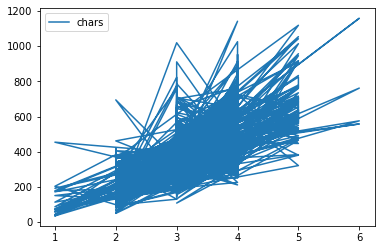

In [297]:
plt.plot(data['score'], data['POS'], label = "chars")
plt.legend()
plt.show()

In [298]:
#X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]].values # Input Data: Content of the essay
#X = data.iloc[:, [2, 10, 12, 14, 16, 17]].values # Input Data: Content of the essay
X = data.iloc[:, [12, 14, 16, 17]].values # Input Data: Content of the essay
#X = data.iloc[:, [1, 2, 10, 12, 14, 13, 15, 16, 17]].values
y = data.iloc[:, -1].values # Labeled Data: Score

We plot X and y on a line graph to check if the columns chosen are apporpriate for the model

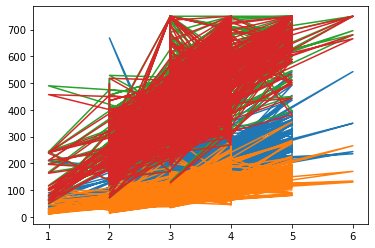

In [299]:
plt.plot(y, X)
plt.show()

### c. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.


In [300]:
from sklearn.model_selection import train_test_split

We use 75% of the data for training and the remaining 25% for testing as this seems to be the optimal ratio for better accuracy

In [301]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.25)

In [302]:
len(X_test)

333

## 3. Classification

### a. Explain the difference between binary and multi-class classification.
Binary classification are the classfiication tasks that have only two class labels
whereas multiclass classification are the classification tasks that have more than two class labels.[1]

### b. Normalising the data
Normalization of data is done to transform features to be on a similar scale to improve stability and performance of the model.

Use StandardScaler to scale the input and labeled data accordingly

In [303]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  ## fit transform
X_test = sc.transform(X_test) ## trasform

### c. Use the Support Vector Machine algorithm to build the model.

#### i. Describe SVM (in relation to Linear Regression).
SVM stands for Support Vector Machine and is a linear model for classification and regression problems. [2]
SVM supports both linear and non linear through kernel. SVM handles outliers better than Linear Regression[3]

#### ii. In SVM/SVR, there is something called the kernel. Explain what you understand from it.
A kernel is a method used in SVM to apply linear classifiers to non-linear problems [4]


### We compare which kernel best suits the model to achieve highest accuracy

In [304]:
from sklearn import svm
linear = svm.SVC(kernel = 'linear').fit(X_train, y_train)
poly = svm.SVC(kernel = 'poly', degree = 4).fit(X_train, y_train)
rbf = svm.SVC(kernel = 'rbf').fit(X_train, y_train)
sigmoid  = svm.SVC(kernel = 'sigmoid').fit(X_train, y_train)


In [305]:
l_pred = linear.predict(X_test)
p_pred = poly.predict(X_test)
r_pred = rbf.predict(X_test)
s_pred = sigmoid.predict(X_test)

In [306]:
from sklearn.metrics import accuracy_score
l = accuracy_score(y_test, l_pred)
p = accuracy_score(y_test, p_pred)
r = accuracy_score(y_test, r_pred)
s = accuracy_score(y_test, s_pred)
print(l, p, r, s)

0.7057057057057057 0.5105105105105106 0.7087087087087087 0.5735735735735735


We can see that rbf is the most accurate, hence we use it to train our model

### d. Predict

#### i. Using the testing dataset you created in 2(c) above, conduct the prediction for the ‘score’ (label).

In [307]:
clf = svm.SVC(kernel = 'rbf').fit(X_train, y_train)
#clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([4, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 2, 3,
       4, 4, 3, 4, 4, 4, 2, 4, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3,
       4, 3, 3, 4, 3, 4, 3, 2, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 2, 3, 4, 4, 4, 3, 2,
       4, 3, 3, 3, 2, 4, 3, 4, 4, 4, 3, 4, 3, 2, 4, 3, 4, 3, 4, 4, 3, 3,
       4, 4, 3, 3, 4, 3, 4, 3, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4, 3,
       2, 3, 4, 4, 2, 4, 4, 2, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3,
       4, 3, 3, 4, 4, 4, 4, 4, 2, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3,
       3, 3, 3, 4, 3, 4, 4, 3, 2, 4, 3, 3, 4, 3, 2,

### ii. Display the confusion matrix (it should look like a 6x6 matrix).Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification.

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.83      0.59      0.69        32
           3       0.71      0.74      0.72       142
           4       0.69      0.79      0.74       141
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         1

    accuracy                           0.71       333
   macro avg       0.37      0.35      0.36       333
weighted avg       0.67      0.71      0.69       333



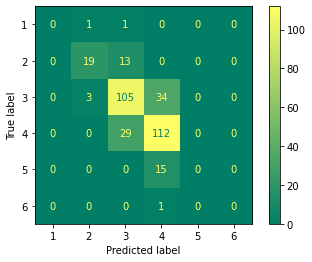

In [308]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test, cmap = 'summer') 
plt.show()

In [309]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7087087087087087

### iii. Explain Quadratic Weighted Kappa (QWK). 
QWK is the measure of agreement between 2 outcomes [5]

### iv. Use the sklearn.metrics library to code and obtain the QWK score.

In [310]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred, y_test, labels=None, weights='linear')

0.5832395737203393

### a. Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the model you built earlier to predict the ‘score’.

#### Read the file

In [311]:
df = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
df['essayid']

0      1623
1      1143
2       660
3      1596
4       846
       ... 
194    1226
195     862
196    1562
197    1336
198    1171
Name: essayid, Length: 199, dtype: int64

#### Select the relevant columns used to predict

In [312]:
z = df.iloc[:,[12, 14, 16, 17]].values
z = sc.fit_transform(z)
y_final = clf.predict(z)
y_final

array([4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3,
       4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 2, 3, 3, 4, 3, 4,
       4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 2, 4, 4,
       2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 4, 3, 4, 3, 3, 4, 4,
       5, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 2, 4, 4, 4, 3, 2, 4, 4,
       2, 3, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3,
       4, 3, 3, 3, 4, 4, 4, 3, 2, 3, 4, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       4], dtype=int64)

### c. Output your prediction to a CSV file that contains 2 columns, ‘essayid’ and ‘score’. It should have a total of 200 lines (1 header, and 199 entries).

In [313]:
output = pd.DataFrame({'essayid': df['essayid'], 'score': y_final})
output.to_csv('32799047-MuhammedHassan.csv',index=False)

# Conclusion

In conclusion, The Machine Learning model developed in this work used supervised learning, the training data used here is Row 12, 14, 16, 17 as those produced the most accuracte results that was fed to the ML to make a prediction. The data was scaled using Standard Scaler and used SVM to build the model. A prediction was made on the data provided and produced a 71% accuracy.

# References

[1] www.javatpoint.com. 2022. Supervised Machine learning - Javatpoint. [online] Available at: <https://www.javatpoint.com/supervised-machine-learning>.        

[2] Medium. 2022. Support Vector Machines(SVM) — An Overview. [online] Available at: <https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.>. 

[3] Medium. 2022. Comparative study on Classic Machine learning Algorithms. [online] Available at: <https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222> . 

[4] Programmathically - A Blog on Building Machine Learning Solutions. 2022. What is a Kernel in Machine Learning? - Programmathically. [online] Available at: <https://programmathically.com/what-is-a-kernel-in-machine-learning/> .

[5] Kaggle.com. 2022. Simple Explanation of Quadratic Weighted Kappa. [online] Available at: <https://www.kaggle.com/code/prashant111/simple-explanation-of-quadratic-weighted-kappa/notebook> .    
